## Disocvering The Most Popular Star Wars Film

# Introduction:
The data for this analysis was collected as a survey by the team at FiveThirtyEight while waiting for Star Wars: The Force Awakens. In this analysis we are going to be comparing the Star Wars films to determine which one is the most popular and which ones respondensts think are the best. We will try to answer the following question:
* Are the original 3 movies(Star Wars Episodes Iv to VI) better than the rest?
* Who is the most liked character?
* Which of the films are the most popular amongst fans?
* Which of the films are the most popular amongst non fans? etc.



# Reading The Data and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
#returns the frequency of unique characters in a column including null values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [6]:
# maps the strings 'Yes' and 'No' to true and false respectively.
yes_no ={'Yes': True,
        'No': False}


star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [7]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print('\n')
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


# Cleaning The columns 3 to 8

In [8]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [9]:
# maps the old column names to new columnn names
new_name ={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
           
       'Unnamed: 4': 'seen_2',
           'Unnamed: 5': 'seen_3',
           'Unnamed: 6': 'seen_4',
           'Unnamed: 7': 'seen_5',
           'Unnamed: 8': 'seen_6'}

# renames the selected columns with the new_name mapping
star_wars.rename(new_name, axis=1, inplace=True)

In [10]:
# maps the response for each of the star wars episode seen to True or False

star_wars['seen_1'] = star_wars['seen_1'].map({'Star Wars: Episode I  The Phantom Menace':True,
                                              np.nan:False})
star_wars['seen_2'] = star_wars['seen_2'].map({'Star Wars: Episode II  Attack of the Clones':True,
                                              np.nan:False})
star_wars['seen_3'] = star_wars['seen_3'].map({'Star Wars: Episode III  Revenge of the Sith':True,
                                              np.nan:False})
star_wars['seen_4'] = star_wars['seen_4'].map({'Star Wars: Episode IV  A New Hope':True,
                                              np.nan:False})
star_wars['seen_5'] = star_wars['seen_5'].map({'Star Wars: Episode V The Empire Strikes Back':True,
                                              np.nan:False})
star_wars['seen_6'] = star_wars['seen_6'].map({'Star Wars: Episode VI Return of the Jedi':True,
                                              np.nan:False})



# Cleaning Columns 9 to 14

In [11]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
col_name = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
            
       'Unnamed: 10': 'ranking_2', 
            'Unnamed: 11': 'ranking_3',
            'Unnamed: 12': 'ranking_4',
            'Unnamed: 13': 'ranking_5',
       'Unnamed: 14': 'ranking_6'}
star_wars.rename(col_name, axis=1, inplace=True)

# Episodes Mean Ranking

In [14]:
mean_ranking = star_wars[star_wars.columns[9:15]].mean()

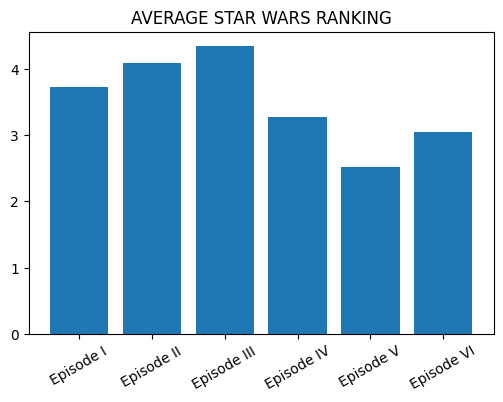

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
x= range(6)
y = mean_ranking
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
plt.xticks(x, labels, rotation=30)
plt.bar(x, y)
plt.title('AVERAGE STAR WARS RANKING')
plt.show()


In our dataset, the lower the ranking, the better the star wars movie. From what we can see in the chart, the first 3 movies seem to be ranked higher than the latter 3. This could be because they are the original star wars trilogy. Of all of the the star wars films, episode V(The Empire strikes back) is ranked better than the rest.

# Episode Views Count

In [16]:
seen_count = star_wars[star_wars.columns[3:9]].sum()

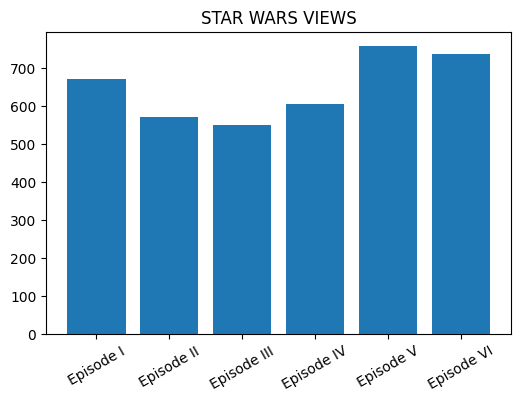

In [17]:
# displays a bar plot of the total views of each star wars episode
x= range(6)
y = seen_count
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
plt.xticks(x, labels, rotation=30)
plt.bar(x, y)
plt.title('STAR WARS VIEWS')
plt.show()

From our bar chart, the last two episodes V and VI have the most views. This also corresponds with our average ranking of each the films. The films with the most views have the better ranking.

# Star Wars Fans Analysis

In [18]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [19]:
star_wars.rename({'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Fan/Not'},
                axis=1, inplace=True)

In [20]:
fans = star_wars[star_wars['Fan/Not'] == True]

In [21]:
not_fans =star_wars[star_wars['Fan/Not'] == False]

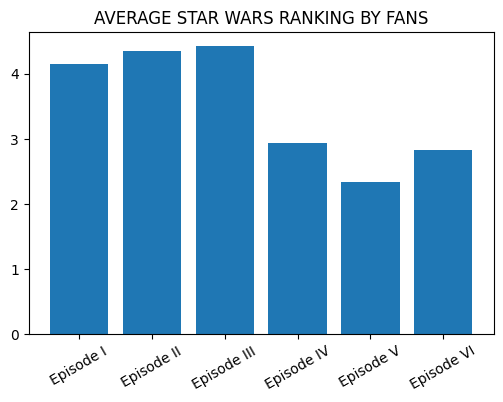

In [22]:
# displays a bar chat of the mean ranking of each episodes by respondents who are star wars fans
fan_avg_ranking = fans[fans.columns[9:15]].mean()

x= range(6)
y = fan_avg_ranking
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
plt.xticks(x, labels, rotation=30)
plt.bar(x, y)
plt.title('AVERAGE STAR WARS RANKING BY FANS')
plt.show()


The average ranking by the fans is completely similar to the average ranking of the films by all the respondents. The first 3 films are still ranked better than the last 3.

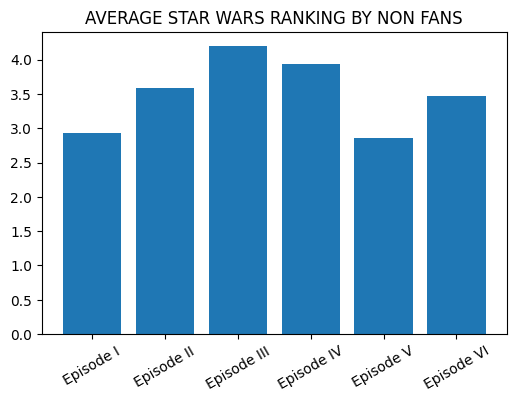

In [23]:
# displays a bar chat of the mean ranking of each episodes by respondents who are not star wars fans
notfans_avg_ranking = not_fans[not_fans.columns[9:15]].mean()

x= range(6)
y = notfans_avg_ranking
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
plt.xticks(x, labels, rotation=30)
plt.bar(x, y)
plt.title('AVERAGE STAR WARS RANKING BY NON FANS')
plt.show()


Looking at the avegage rankings from respondents who are not star wars fans, the first thing you notice is that the episode I has the best ranking as opposed to the episode V in the ranking by fans. This could probably be because the episode I is the most watched by non star wars fans.

In [24]:
fans_seen_count = fans[fans.columns[3:9]].sum()

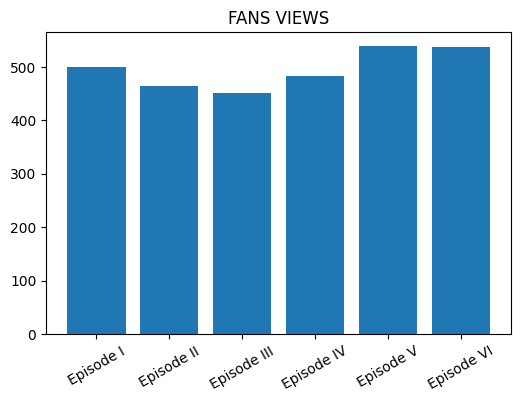

In [25]:
# displays a bar plot of the total views of each star wars episode
x= range(6)
y = fans_seen_count
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
plt.xticks(x, labels, rotation=30)
plt.bar(x, y)
plt.title('FANS VIEWS')
plt.show()

In [26]:
notfans_seen_count = not_fans[not_fans.columns[3:9]].sum()

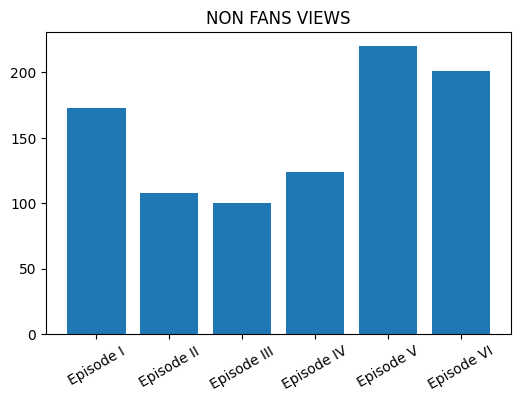

In [27]:
# displays a bar plot of the total views of each star wars episode
x= range(6)
y =notfans_seen_count
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
plt.xticks(x, labels, rotation=30)
plt.bar(x, y)
plt.title('NON FANS VIEWS')
plt.show()

Amongst star wars fans and non star wars fans, episodes V, VI and I appear to be the most popular of the star wars films. About half the respondents who aren't star wars fans haven't seen episodes II, III and IV.

# Cleaning Columns 15  to 28

In [28]:
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [29]:
col_name = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
            
       'Unnamed: 16': 'Luke Skywalker',
       'Unnamed: 17': 'Princess Leia',
       'Unnamed: 18': 'Anakin Skywalker',
       'Unnamed: 19': 'Obi Wan Kenobi',
       'Unnamed: 20': 'Emperor Palpatine',
       'Unnamed: 21': 'Darth Vader',
       'Unnamed: 22': 'Lando Calrissian',
       'Unnamed: 23': 'Boba Fett',
       'Unnamed: 24': 'C-3PO',
       'Unnamed: 25': 'R2-D2',
       'Unnamed: 26': 'Jar Jar Binks',
       'Unnamed: 27': 'Padme Amidala',
       'Unnamed: 28': 'Yoda'}
star_wars.rename(col_name, axis=1, inplace=True)

In [30]:
star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3PO,R2-D2,Jar Jar Binks,Padme Amidala,Yoda
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


# Likeable Star Wars Characters

In [31]:
star_wars['Han Solo'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In [32]:
# assigns points to characters based on how favourable respondents find them.
def character_cat(character):
    if pd.isnull(character):
        return np.nan
    elif character == 'Very favorably':
        return 2.0
    elif character == 'Somewhat favorably':
        return 1.5
    elif character == 'Somewhat unfavorably':
        return 1.0
    elif character == 'Very unfavorably':
        return 0.5
    else:
        return 0
    
for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].apply(character_cat)

In [33]:
star_wars[star_wars.columns[15:29]].sum().sort_values(ascending=False)

Han Solo             1455.0
Luke Skywalker       1447.0
Yoda                 1438.0
Obi Wan Kenobi       1432.0
Princess Leia        1424.0
R2-D2                1414.5
C-3PO                1318.0
Darth Vader          1053.0
Anakin Skywalker      996.0
Padme Amidala         685.5
Lando Calrissian      685.5
Boba Fett             624.0
Jar Jar Binks         623.0
Emperor Palpatine     564.5
dtype: float64

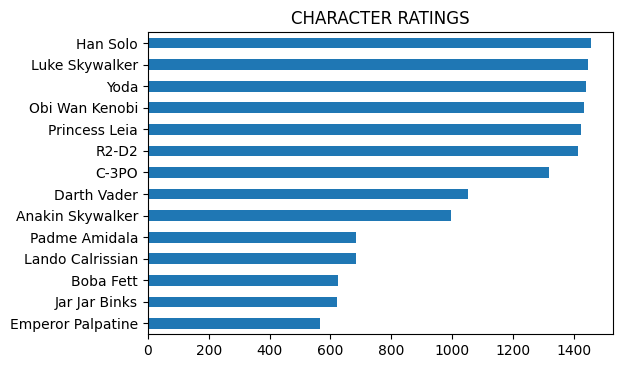

In [34]:
#displays a bar plot showing the characters liked and disliked the most
star_wars[star_wars.columns[15:29]].sum().sort_values().plot.barh()
plt.title('CHARACTER RATINGS')
plt.show()

From our chart, Han Solo, Luke Skywalker and Yoda seem to be the most liked characters while Boba Fett, Jar Jar Binks and Emperor Palpatine are the most disliked characters.

In [39]:
# groups the dataset by their location
age_grp = star_wars.groupby('Age')

In [41]:
age_grp.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Fan/Not,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,2.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,0.0,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,2.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,1.5,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
10,3292637870,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,3292635062,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,3292596911,True,True,True,True,True,True,True,True,4.0,...,2.0,I don't understand this question,No,NaN,No,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
30,3292366792,True,False,True,True,True,True,True,True,4.0,...,1.5,I don't understand this question,No,NaN,No,Male,30-44,"$0 - $24,999",High school degree,New England
31,3292339379,True,True,True,True,True,True,True,True,6.0,...,2.0,Han,Yes,Yes,Yes,Male,30-44,"$50,000 - $99,999",Some college or Associate degree,West North Central


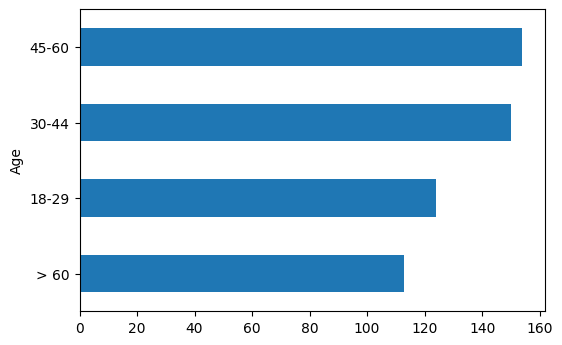

In [42]:
# displays a bar plot showing the age of respondents who are starwars fans
age_grp['Fan/Not'].sum().sort_values().plot.barh()
plt.show()

The most common ages for respondents who are star wars fans are 45-60. This makes sense as the original star wars trilogy debuted at the time they were youths.

# Conclusion:

Star wars is one of the biggest and most influential fiction out there. From our analysis, we found out that the original 3 star wars films are by far the most popular and they also rank very highly amongst fans and non fans alike. Star Wars Episode V: The empire strikes back is the most popular and the most highly ranked amongst all of the star wars films. Han Solo and Luke Skywalker are the two most popular characters which is unsurprising as they are the main protagonists in the most popular if the films.